In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

### 1. 
Implemente os algoritmos da iteração de ponto fixo, Newton-Raphson e secante usando somente a biblioteca Numpy

In [2]:
fA = lambda x: np.cos(x) - np.sin(x)
fADT = lambda x: -np.sin(x) - np.cos(x)

In [3]:
print(f"Ponto fixo: {opt.fixed_point(fA, x0=-1, xtol=10e-10)}\n")

Ponto fixo: 0.4566247045676308



In [4]:
print(f"Newton-Raphson:\n {opt.root_scalar(fA, fprime=fADT, x0=-1, x1=1, rtol=10e-10, method='newton')}\n")

Newton-Raphson:
       converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: -5.497787143782138



In [5]:
print(f"Secante:\n {opt.root_scalar(fA, x0=-1, x1=1, rtol=10e-10, method='secant')}\n")

Secante:
       converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.7853981633974484



### 2.
Use a iteração de ponto fixo simples para localizar a raiz de $f (x) = 2 sin(x^{1/2})− x$, tendo $x_0 = 0,5$
e adotando como critério de parada o erro ea ≤ 0, 001%.

In [6]:
fB = lambda x: 2*np.sin(np.sqrt(x)) - x
opt.fixed_point(fB, x0=0.5, xtol=1e-3)

array(0.76864886)

### 3.
Determine a maior raiz real de $ f (x) = 2x^3 − 11.7x^2 + 17.7x − 5$


In [7]:
fC = lambda x: 2*(x**3) - 11.7*(x**2) + 17.7*x - 5
fCDT = lambda x: 6*(x**2) - 23.4*x + 17.7

xC = np.linspace(-1, 2, 1000)
rootC = [975]

#### (a) 
Graficamente:


[]

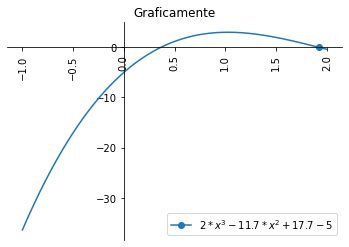

In [8]:
figA, axA = plt.subplots()
axA.spines['top'].set_color('none')
axA.spines['bottom'].set_position('zero')
axA.spines['left'].set_position('zero')
axA.spines['right'].set_color('none')
# A marcação é a aproximação da maior raiz
axA.plot(xC, fC(xC), label="$2*x^{3} - 11.7*x^{2} + 17.7 - 5$", marker="o", markevery=rootC)
plt.legend()
plt.xticks(np.arange(-2, 3, step=0.5), rotation=90)
plt.yticks(np.arange(-100, 20, step=10.0))
plt.title("Graficamente")
plt.plot()

#### (b)
Pelo método da iteração de ponto fixo (três iterações, $x_0 = 3$)( certifique-se de desenvolver
uma solução que convirja para a raiz);

In [9]:
print(f"Ponto fixo: {opt.fixed_point(fC, x0=-1, xtol=10e-10)}\n")

Ponto fixo: 0.4077785252341441



#### (c) 
Pelo método de Newton-Raphson (três iterações, $x_0 = 3$);

In [10]:
print(f"\nNewton-Raphson:\n {opt.root_scalar(fC, fprime=fCDT, x0=3, maxiter=3,method='newton')}\n")


Newton-Raphson:
       converged: False
           flag: 'convergence error'
 function_calls: 6
     iterations: 3
           root: 3.7929344806432264



#### (d) 
Pelo método da secante (três iterações, $x_−1 = 3, x_0 = 4$).

In [11]:
print(f"\nSecante:\n {opt.root_scalar(fC, x0=3, x1=4, maxiter=3, method='secant')}\n")


Secante:
       converged: False
           flag: 'convergence error'
 function_calls: 5
     iterations: 3
           root: 3.5862753847117346



### 4.
Compare os métodos da bisseção, falsa posição, do ponto fixo, de Newton-Raphson e da secante, localizando a raiz das seguintes equações:

Para as avaliações, deve-se considerar:

• o número máximo de iterações de todos os métodos testados não pode ultrapassar 200;

• a tolerância deve ser de $10^{−10}$;

• para os métodos abertos, escolha os limites do intervalo, respectivamente como $x_{?1}$ e $x_0$.

Para cada método, estamos interessados em comparar:

• raiz;

• número de iterações até o critério de parada;

• se houve erro de convergência;

• tempo de cálculo (procure como calcular tempo de execução usando jupyter notebooks, como $ {%timeit}$.


In [12]:
RTOL = 10e-10
MAXITER = 200

In [13]:
def regulaFalsi(f, a, b):
    global MAXITER, RTOL
    converged = True
    flag = "converged"
    res = float("inf")
    sA = np.sign(f(a))
    sB = np.sign(f(b))
    erro = 1
    res_ant = 0
    i = 0
    if sA * sB == -1:
        while erro > RTOL and i < MAXITER:
            res = b - ((f(b) * (a - b)) / (f(a) - f(b)))
            if f(res) == 0:
                break
            else:
                if sA * np.sign(f(res)) == -1:
                    b = res
                else:
                    a = res
            erro = np.abs(a - b)/(np.abs(a) + np.abs(b)/2) # evitando divisao por 0
            res_ant = res
            i += 1
        if erro > RTOL:
            flag = "convergence error"
            converged = False
    return {
            "converged": converged,
            "flag": flag,
            "iterations": i,
            "root": res
           }

In [14]:
def allFunctions(f, fDT, a, b):
    global MAXITER, RTOL
    try:
        print("Bisseção")
        %timeit opt.root_scalar(f, bracket=[a, b], rtol=RTOL, maxiter=MAXITER, method="bisect")
        print(opt.root_scalar(f, bracket=[a, b], rtol=RTOL, maxiter=MAXITER, method="bisect"))
    except Exception as e:
        print(e)
    try:
        print("\nFalsa posição")
        %timeit regulaFalsi(f, a, b)
        print(regulaFalsi(f, a, b))
    except Exception as e:
        print(e)
    try:
        print("\nPonto fixo")
        %timeit opt.fixed_point(f, x0=a, xtol=RTOL, maxiter=MAXITER)
        print(opt.fixed_point(f, x0=a, xtol=RTOL, maxiter=MAXITER))
    except Exception as e:
        print(e)
    try:
        print("\nNewton-Raphson")
        %timeit opt.root_scalar(f, fprime=fDT, x0=a, x1=b, rtol=RTOL, maxiter=MAXITER, method="newton")
        print(opt.root_scalar(f, fprime=fDT, x0=a, x1=b, rtol=RTOL, maxiter=MAXITER, method="newton"))
    except Exception as e:
        print(e)
    try:
        print("\nSecante")
        %timeit opt.root_scalar(f, x0=a, x1=b, rtol=RTOL, maxiter=MAXITER, method="secant")
        print(opt.root_scalar(f, x0=a, x1=b, rtol=RTOL, maxiter=MAXITER, method="secant"))
    except Exception as e:
        print(e)

#### Letra (a)

In [15]:
# função letra (a)

fAA = lambda x: 2*(x**4) + 4*(x**3) + 3*(x**2) - 10*x - 15
fAADT = lambda x: 8*(x**3) + 12*(x**2) + 6*x - 10
arrAA = np.linspace(-1, 4, 100)
xAAa = 0
xAAb = 3

In [16]:
# Execução função letra (a)

allFunctions(fAA, fAADT, xAAa, xAAb)

Bisseção
55.2 µs ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 33
     iterations: 31
           root: 1.4928787085227668

Falsa posição
1.58 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
{'converged': True, 'flag': 'converged', 'iterations': 100, 'root': 1.4928787086636037}

Ponto fixo
31 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
-1.2164931649051722

Newton-Raphson
251 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: -1.3003841326439198

Secante
458 µs ± 34.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -1.3003841326439196


#### Letra (b)

In [17]:
# função letra (b)

fBB = lambda x: (x+3)*(x+1)*((x-2)**3)
fBBDT = lambda x: 4*(x**3) - 18*x + 4
arrBB = np.linspace(-1, 6, 100)
xBBa = 0
xBBb = 5

In [18]:
# Execução função letra (b)

allFunctions(fBB, fBBDT, xBBa, xBBb)

Bisseção
30.1 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 34
     iterations: 32
           root: 2.000000000698492

Falsa posição
2.36 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
{'converged': False, 'flag': 'convergence error', 'iterations': 200, 'root': 1.7144091362276437}

Ponto fixo
Failed to converge after 200 iterations, value is 0.013625597448023453

Newton-Raphson
12.7 ms ± 625 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      converged: False
           flag: 'convergence error'
 function_calls: 400
     iterations: 200
           root: nan

Secante
2.33 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      converged: True
           flag: 'converged'
 function_calls: 60
     iterations: 59
           root: 2.000000051206814


#### Letra (c)

In [19]:
# função letra (c)

fCC = lambda x: 5*(x**3) + x**2 - np.exp(1 - (2*x)) + np.cos(x) + 20
fCCDT = lambda x: 15*(x**2) + 2*x + 2*np.exp((-2*x) + 1) - np.sin(x)
arrCC = np.linspace(-6, 6, 100)
xCCa = -5
xCCb = 5

In [20]:
# Execução função letra (c)

allFunctions(fCC, fCCDT, xCCa, xCCb)

Bisseção
146 µs ± 7.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: -0.9295604593353346

Falsa posição
14.2 ms ± 4.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
{'converged': False, 'flag': 'convergence error', 'iterations': 200, 'root': 1.5687692610780044}

Ponto fixo


<ipython-input-19-ddb63f2204d3>:3: RuntimeWarning: overflow encountered in exp
  fCC = lambda x: 5*(x**3) + x**2 - np.exp(1 - (2*x)) + np.cos(x) + 20


313 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-5.0

Newton-Raphson
987 µs ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 26
     iterations: 13
           root: -0.9295604598378413

Secante
2.01 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 24
     iterations: 23
           root: -0.9295604598378417


#### Letra (d)

In [21]:
# função letra (d)

fDD = lambda x: np.sin(x)*x + 4
fDDDT = lambda x: x*np.cos(x) + np.sin(x)
arrDD = np.linspace(0, 6, 100)
xDDa = 1
xDDb = 5

In [22]:
# Execução função letra (d)

allFunctions(fDD, fDDDT, xDDa, xDDb)

Bisseção
88.7 µs ± 5.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 32
     iterations: 30
           root: 4.323239546269178

Falsa posição
4.88 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
{'converged': False, 'flag': 'convergence error', 'iterations': 200, 'root': 4.323239543713715}

Ponto fixo
1.54 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.340370922950309

Newton-Raphson
656 µs ± 46.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 8
           root: -5.461308012588998

Secante
409 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 4.323239543713714


#### Letra (e)

In [23]:
# função letra (e)

fEE = lambda x: (x - 3)**5 * np.log(x)
fEEDT = lambda x: 5*np.log(x) * (x - 4)**5 + ((x - 3)**5/x)
arrEE = np.linspace(1, 6, 100)
xEEa = 2
xEEb = 5

In [24]:
# Execução função letra (e)

allFunctions(fEE, fEEDT, xEEa, xEEb)

Bisseção
92.8 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 32
     iterations: 30
           root: 2.9999999990686774

Falsa posição
5.72 ms ± 537 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
{'converged': False, 'flag': 'convergence error', 'iterations': 200, 'root': 2.593909764205461}

Ponto fixo
Failed to converge after 200 iterations, value is nan

Newton-Raphson


<ipython-input-23-c88c3401e39a>:3: RuntimeWarning: invalid value encountered in log
  fEE = lambda x: (x - 3)**5 * np.log(x)


4.93 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      converged: True
           flag: 'converged'
 function_calls: 168
     iterations: 84
           root: 1.0

Secante
6.02 ms ± 523 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      converged: True
           flag: 'converged'
 function_calls: 106
     iterations: 105
           root: 2.9999999040707084


#### Letra (f)

In [25]:
# função letra (f)

fFF = lambda x: (x**10) - 1
fFFDT = lambda x: 10*(x**9)
arrFF = np.linspace(0.7, 1.3, 100)
xFFa = 0.8
xFFb = 1.2

In [ ]:
# Execução função letra (f)

allFunctions(fFF, fFFDT, xFFa, xFFb)

Bisseção
14.2 µs ± 901 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 1
           root: 1.0

Falsa posição
1.87 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
{'converged': False, 'flag': 'convergence error', 'iterations': 200, 'root': 0.9999999999999999}

Ponto fixo
1.67 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-0.835079042723559

Newton-Raphson
539 µs ± 52.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 10
           root: 1.0

Secante
